# HW2 - ES18BTECH11016


In [1]:
# Imports
from matplotlib import pyplot as plt, image as mpimg
import numpy as np
from copy import deepcopy


## 1. Binary Morphology


### 1.1 Dilate, Erode, Median


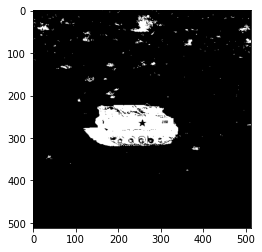

In [2]:
APC = mpimg.imread("APC.tiff")


def binarize(img: np.ndarray, threshold: int) -> np.ndarray:
    imgCopy = deepcopy(img)
    for (i, row) in enumerate(imgCopy):
        for (j, pixel) in enumerate(row):
            if pixel < threshold:
                imgCopy[i][j] = 255
            else:
                imgCopy[i][j] = 0
    return imgCopy


def complementImage(img: np.ndarray):
    imgCopy = deepcopy(img)
    for (i, row) in enumerate(imgCopy):
        for (j, _) in enumerate(row):
            imgCopy[i][j] = 255 - imgCopy[i][j]
    return imgCopy


binarizedAPC = binarize(APC, 80)
plt.imshow(binarizedAPC, cmap="gray")


#### 1.1.1 Dilate

```plaintext
 --------------
|              |
|              |
|    square    |
|              |
|              |
 --------------
      #
     ###
    #####
   ####### Cross
    #####
     ###
      #
```


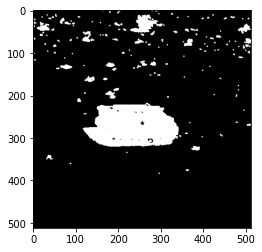

In [3]:
def DilateBinaryImage(img: list[list[int]], window, shape: str):
    window = int(
        window / 2
    )  # Given window is the side. We take the center of the window. So we need distance from the center to the edge.
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if img[i, j] == 0:  # If the pixel is black
                isWhite: bool = False
                if shape == "square":  # Search surrounding square for any whites
                    isWhite = img[
                        i - window : i + window + 1, j - window : j + window + 1
                    ].any()
                elif shape == "cross":  # Search surrounding cross for any whites
                    for ik in range(window):
                        for jk in range(window):
                            if (abs(ik + jk) < window) and (
                                img[i - ik, j - jk] == 255
                                or img[i + ik, j + jk] == 255
                                or img[i + ik, j - jk] == 255
                                or img[i - ik, j + jk] == 255
                            ):
                                isWhite = True
                                break
                if isWhite:
                    imgCopy[i, j] = 255  # If white is found, we dilate
                else:
                    imgCopy[i, j] = 0
    return imgCopy


plt.imshow(DilateBinaryImage(binarizedAPC, 3, "square"), cmap="gray") # Dilate Square(3)


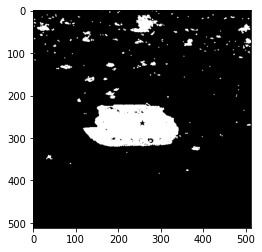

In [4]:
plt.imshow(DilateBinaryImage(binarizedAPC, 5, "cross"), cmap="gray") # Dilate Cross(5)


#### 1.1.2 Erode


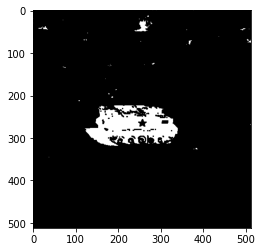

In [5]:
def ErodeBinaryImage(img: list[list[int]], window, shape: str):
    window = int(window / 2)
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if img[i, j] == 255:
                isBlack: bool = False
                if shape == "square":
                    isBlack = not img[
                        i - window : i + window + 1, j - window : j + window + 1
                    ].all()
                elif shape == "cross":
                    for ik in range(window):
                        for jk in range(window):
                            if (abs(ik + jk) < window) and (
                                img[i - ik, j - jk] == 0 or img[i + ik, j + jk] == 0 or img[i + ik, j - jk] == 0 or img[i - ik, j + jk] == 0
                            ):
                                isBlack = True
                                break
                if isBlack:
                    imgCopy[i, j] = 0
                else:
                    imgCopy[i, j] = 255
    return imgCopy


plt.imshow(ErodeBinaryImage(binarizedAPC, 3, "square"), cmap="gray")


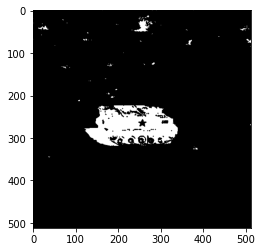

In [6]:
plt.imshow(ErodeBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


#### 1.1.3 Median


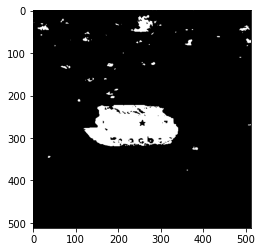

In [7]:
def MedianBinaryImage(img: list[list[int]], window, shape: str):
    window = int(window / 2)
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if True:
                whiteDiff = 0
                if shape == "square":
                    for ik in range(i - window, i + window + 1):
                        for jk in range(j - window, j + window + 1):
                            if img[ik, jk] == 255:
                                whiteDiff += 1
                            else:
                                whiteDiff -= 1
                elif shape == "cross":
                    for ik in range(window):
                        for jk in range(window):
                            if ik + jk < window + 1:
                                if img[i - ik, j - jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i + ik, j + jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i + ik, j - jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i - ik, j + jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                if whiteDiff < 0:
                    imgCopy[i, j] = 0
                elif whiteDiff > 0:
                    imgCopy[i, j] = 255
    return imgCopy


plt.imshow(MedianBinaryImage(binarizedAPC, 3, "square"), cmap="gray")


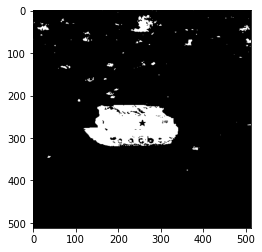

In [8]:
plt.imshow(MedianBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


### 1.2 Verify Duals


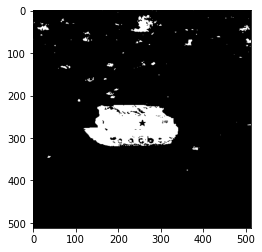

In [9]:
plt.imshow(
    complementImage(MedianBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)


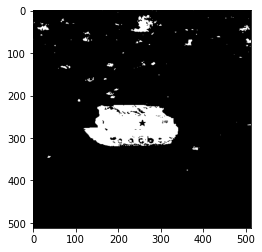

In [10]:
plt.imshow(MedianBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


In [11]:
print(
    str(complementImage(MedianBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(MedianBinaryImage(binarizedAPC, 5, "cross"))
)
print(
    str(complementImage(DilateBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(ErodeBinaryImage(binarizedAPC, 5, "cross"))
)
print(
    str(complementImage(ErodeBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(DilateBinaryImage(binarizedAPC, 5, "cross"))
)


True
True
True
